# Team Members (Blue Clues)

- ### Ben Yang
- ### Carol Wong
- ### Kyle Lua
- ### Michael Ho

# Project Summary

The **project objectives** can be summarised into the following:

1. Use Python's open source Tweepy package and libraries to access Twitter API.
2. Scrape for quoted tweets that correlate to Elon Musk's tweets on 'Twitter' and 'Free Speech' keywords.
3. Do data cleaning on crawled data.
4. Create Entity Relationship Diagram. 
5. Design database schema and data structure in PostgresSQL.
6. Load data into database using SQL.
7. Do sentiment analysis on cleaned data.

## Questions to be Answered:

Based on **Elon Musk's** Tweets using the keywords **"Free Speech"** and **"Twitter"**:

1) Is there a positive correlation between the number of ‘Likes’ and the number of ‘Retweets’?
2) What are the sentiments towards Elon Musk’s tweets based on the Quoted Tweets?

# Twitter API Application

In order to use Twitter API, a Twitter developer account is required.  Apply for the **Essential** level first, then upgrade to **Elevated** level. 

The steps are as follows:

Go to <https://developer.twitter.com> and sign in to your Twitter account. Navigate to **Products → Twitter API**.


<div>
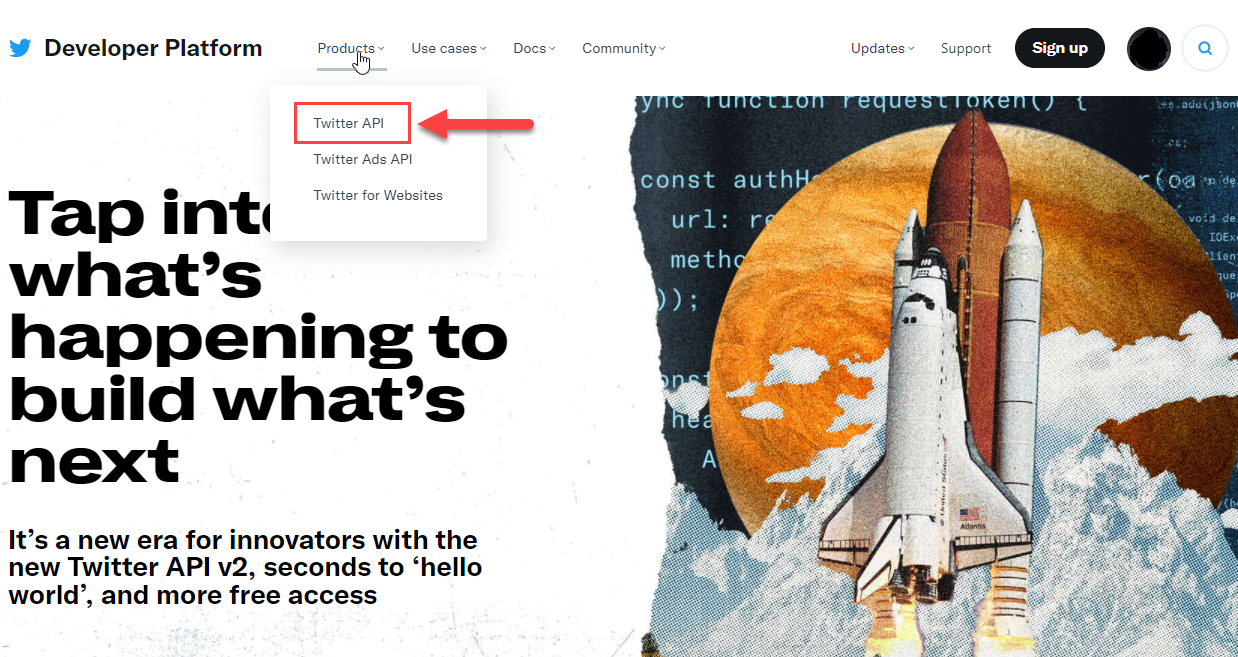
</div>

Then, scroll down to the bottom of the page and click **Get Started**. <br><br>

<div>
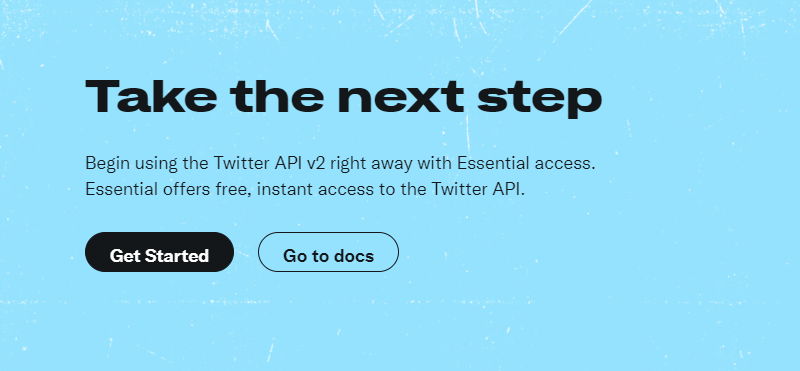
</div>

Click **Apply for a developer account**.  

<div>
<img src="attachment:developer-account" width="700"/>
</div>

Note that you will need to have a verified telephone number associated to your account. If you haven't done it yet, you will see the relevant message - click the button **Add a valid phone number** and follow the instructions.  Click **Next**.

<div>
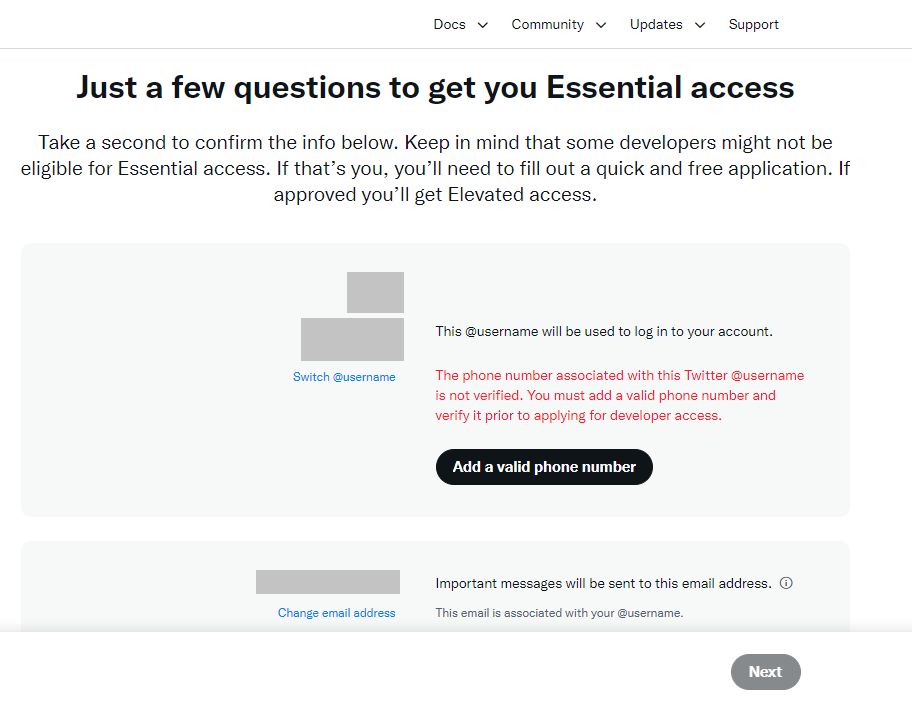
<div>

Fill in the data in the needed fields.  Click **Next**.

<div>
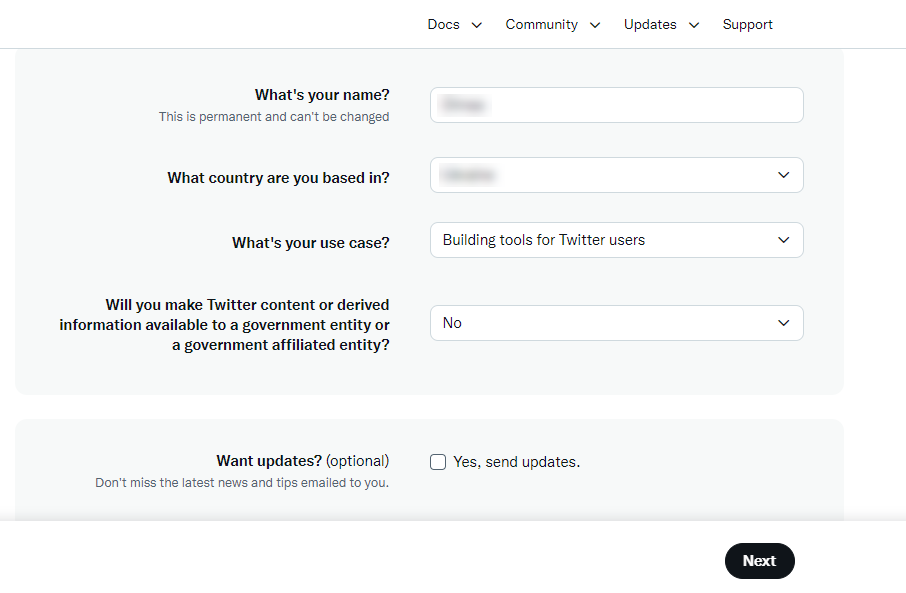
<div>

Accept the Developer agreement & policy.

<div>
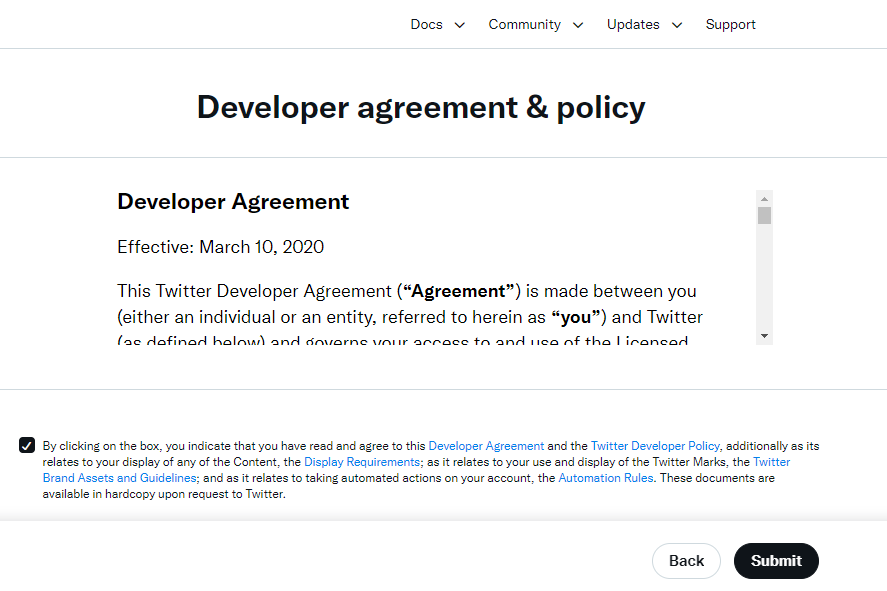
<div>

Verify email. <br><br>

<div>
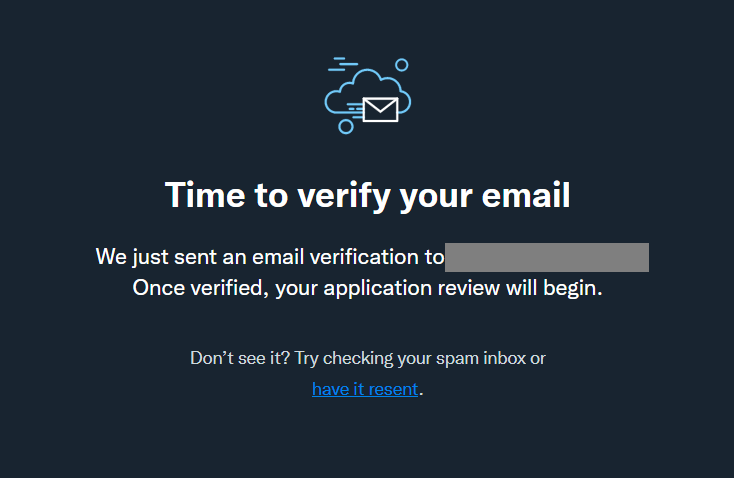
<div>

After email verification, create a App. Give it a name and click **Get keys**. <br><br>

<div>
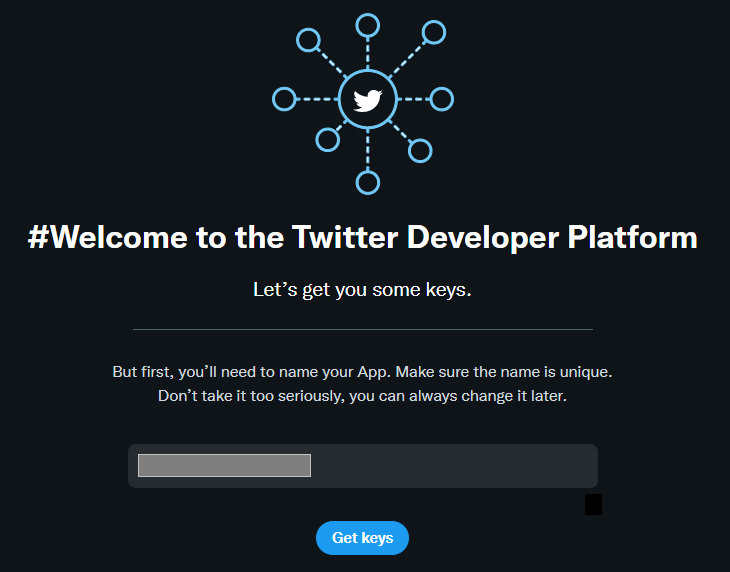
<div>

# Upgrade to Elevated access

Here are the steps to apply for elevated access on the Twitter developer portal:

Go back to the Developer Portal. Navigate to **Products → Twitter API v2 → Elevated**, then click **Apply for Elevated**. <br><br>

<div>
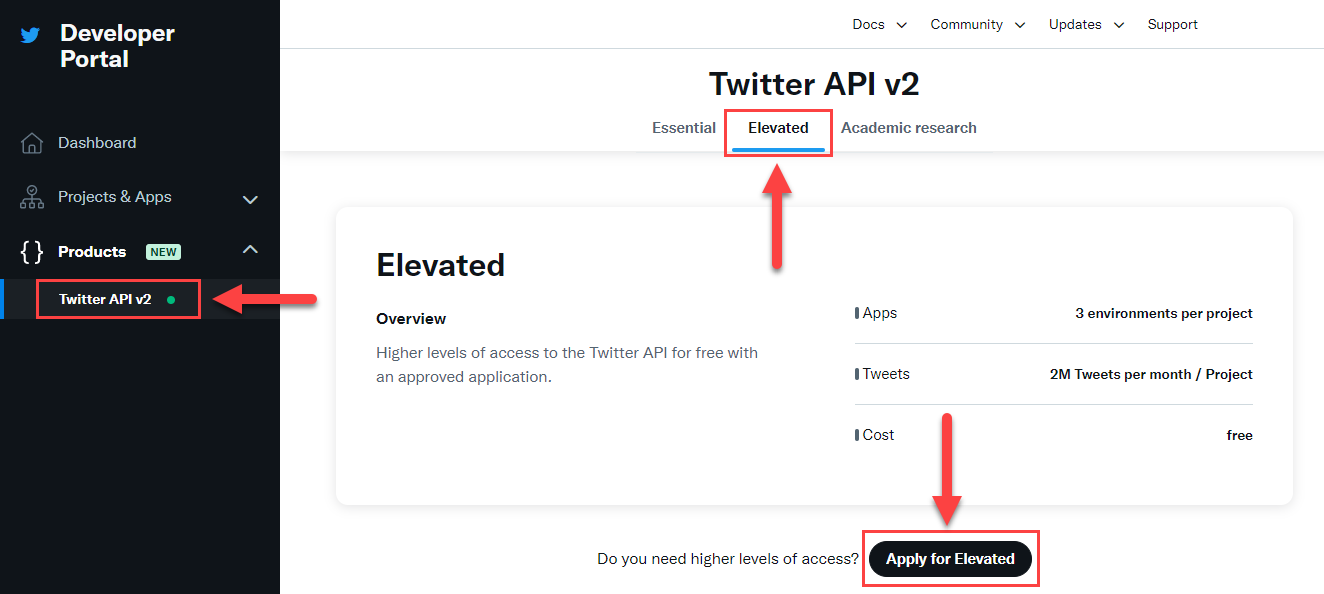
<div>

On the next step, fill the fields with basic info and click **Next**.

<div>
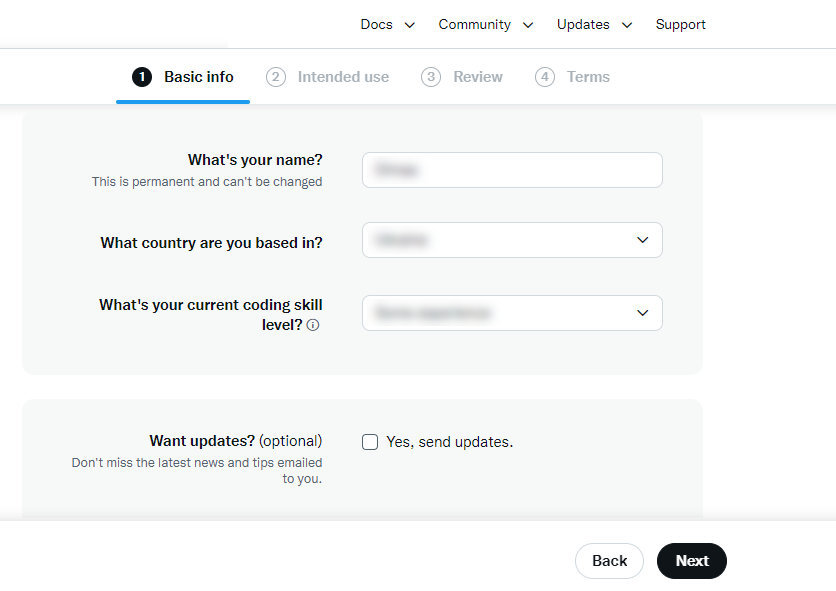
<div>

On the next page, you need to give detailed answers to the set of questions about how you are going to use Twitter API. When you finish, click the button **Next**.

<div>
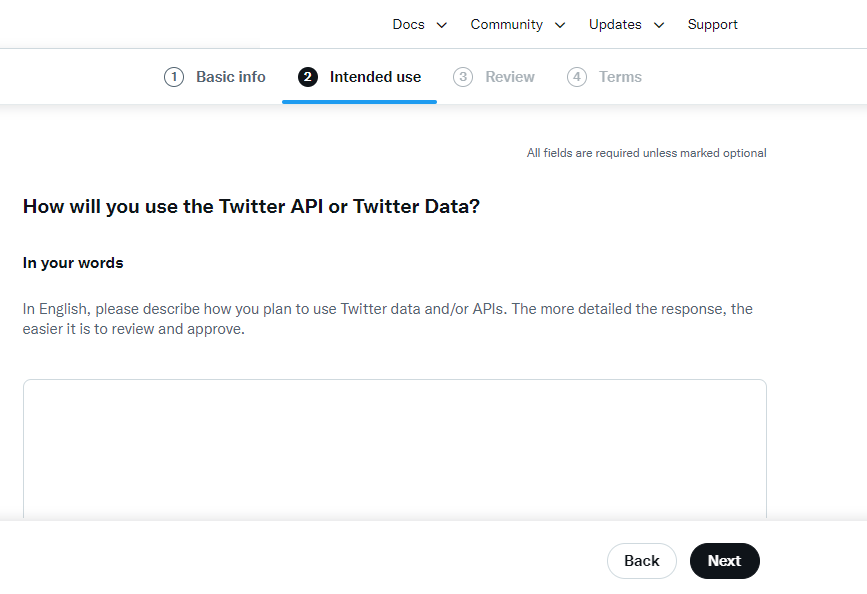
<div>

On the next page  Review you can check your data and answers. If everything is ok, click **Next**.

<div>
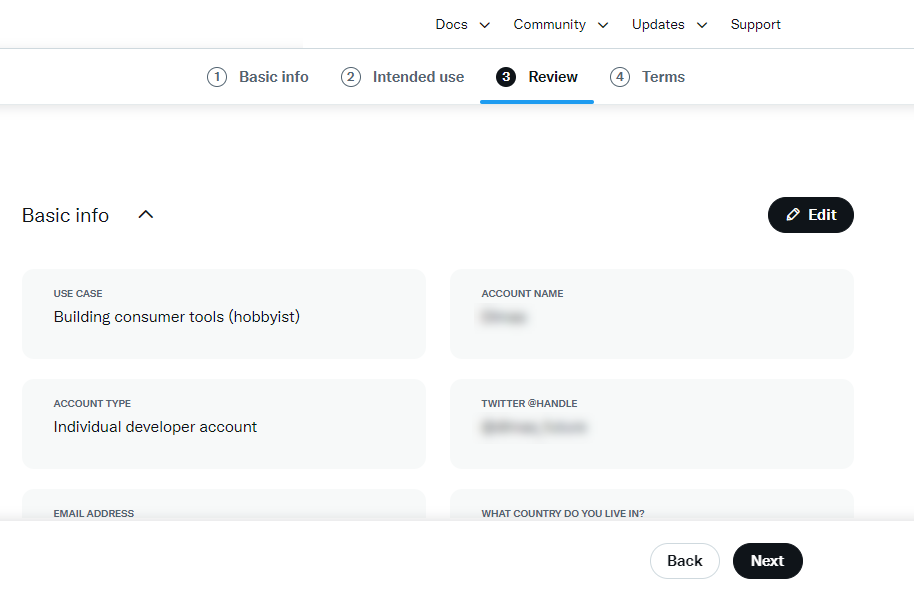
<div>

Accept the Developer agreement & policy. Click **Submit**.

<div>
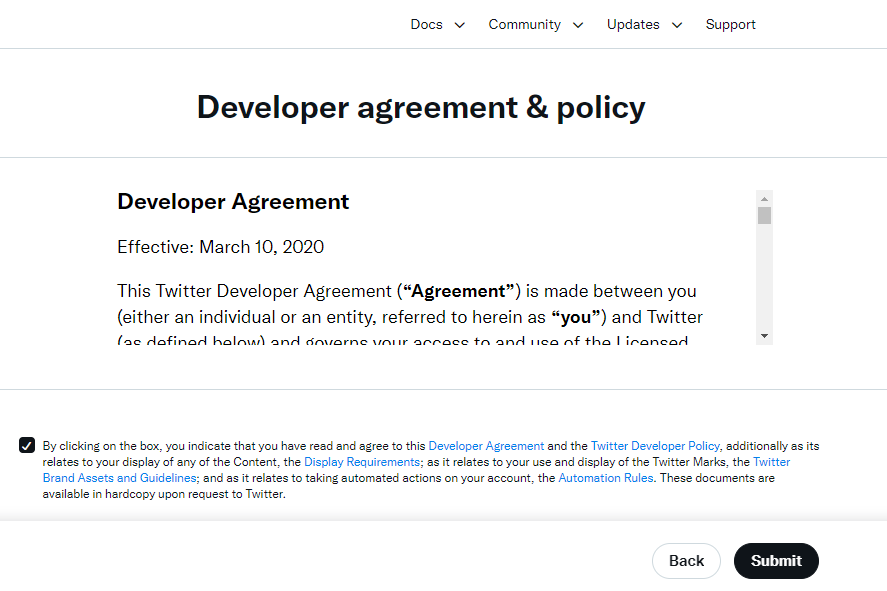
<div>

You will receive an email from Twitter once the Elevated access application has been approved.

<div>
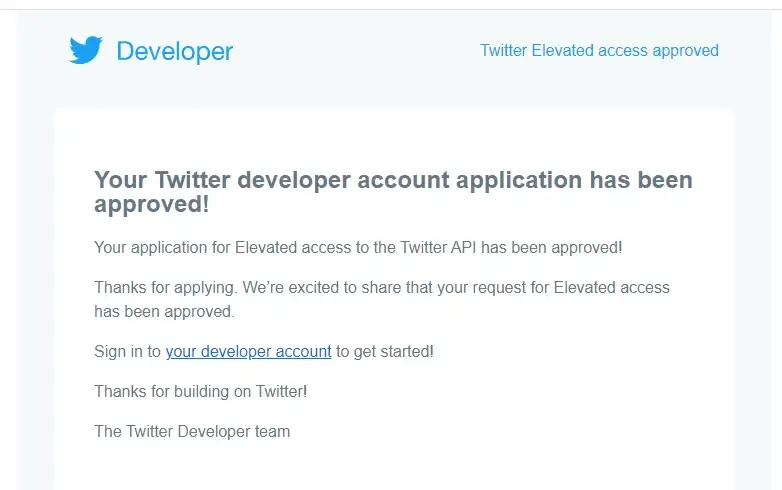
<div>

Go back to Developer Portal and copy the keys and access tokens.<br><br>

<div>
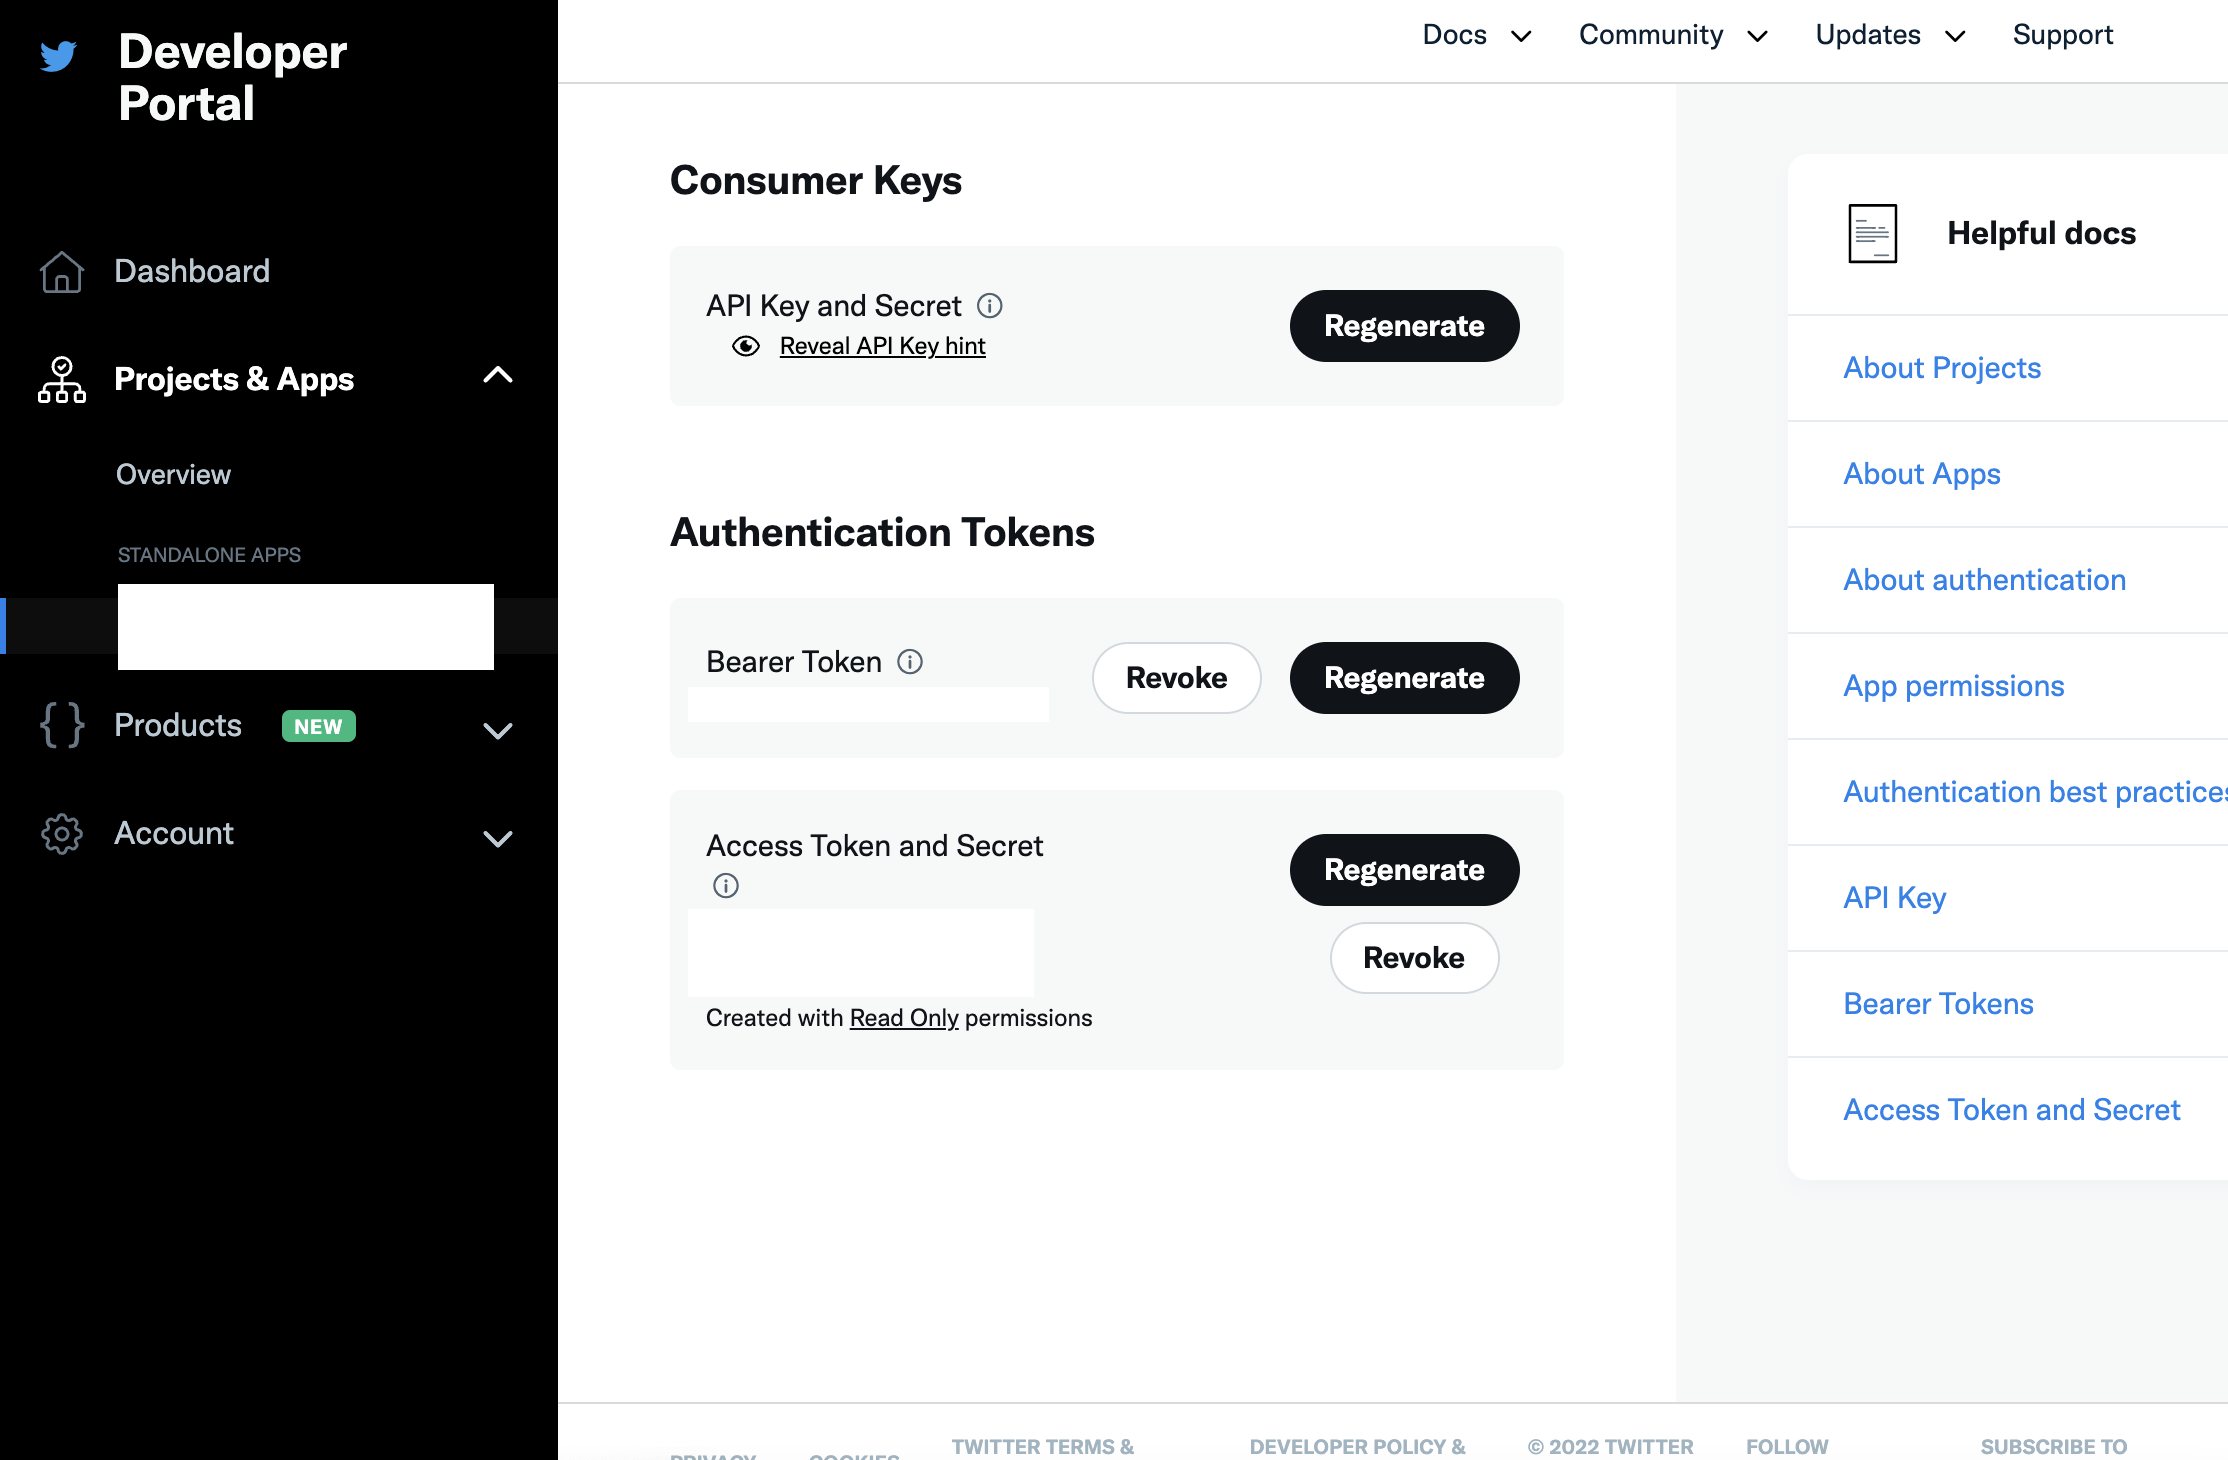
<div>

# DESIGN THINKING METHOLOGY

- ### Define:  
Clearly define the project objectives and deliverables.

- ### Ideate: 
Generate a wide range of ideas for the project. Out-of-the-box thinking during this stage.

- ### Prototype: 
Create a baseline codes representation of one or more of the ideas generated during the ideation stage.  Repeat if needed.

- ### Test: 
Gather feedbacks on the prototype to validate the design and identify areas for improvement.

- ### Iterate: 
Use the findings gathered during testing phase to iterate on the design, repeating steps 3 & 4 as needed until an acceptable solution is found.

# Project Tools and Open Source Libraries

- #### Project Management Tool/ Gantt Chart : Monday.com <br><br>

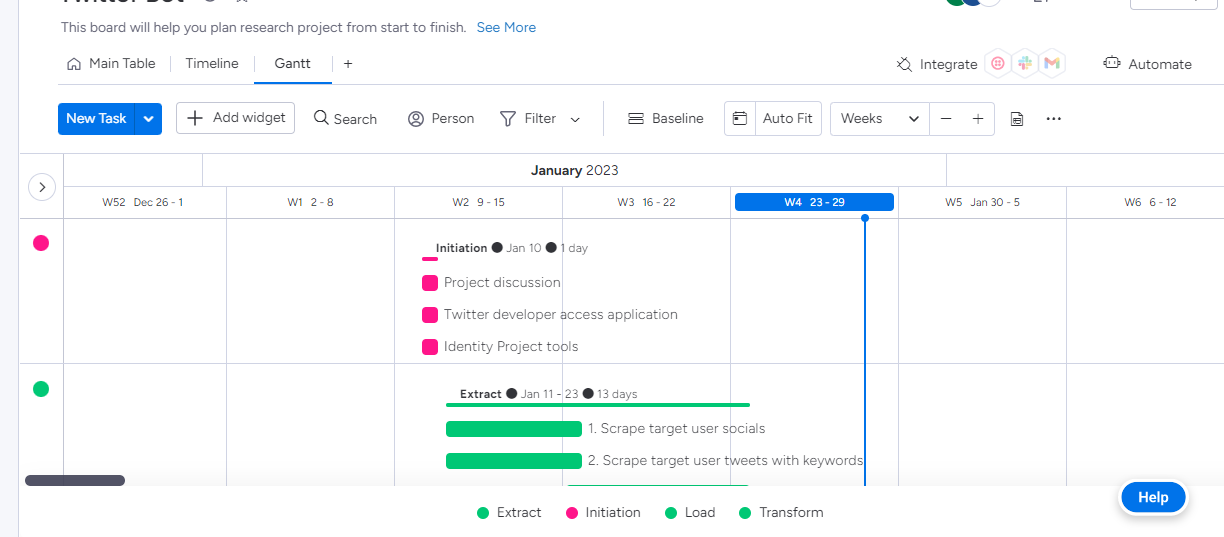
 
- #### Development/Documentation: Jupyter Notebook

- #### Code Development: Python

- #### Database: PostgreSQL

- #### Twitter Scaping: Tweepy

- #### Entity Relationship Diagram: LucidChart

- #### Open-source libraries for ETL process:

#### EXTRACT
- tweepy for accessing the Twitter API
- configparser for hiding keys and secrets

#### TRANSFORM
- pandas for data manipulation and analysis
- pytz for accessing timezone
- re for cleaning tweets
- nltk for cleaning stopwords
- matplotlib for creating visualisations
- VADER for sentiment analysis

#### LOAD
- psycopg2 for data migration and manipulation from postgresql


# TWITTER API ON TWEEPY 

With **Tweepy.Cursor** class object, the amount of tweets scraped were limited (sometimes only able to get 10 tweets) as well as the extracted tweets text were truncated.  Thus they were insufficient and unsuitable for sentiment analysis use.

However, with **Tweepy.Paginator** class object, it allows us to extract more tweets (up to 1000 tweets), access the quoted tweets entity that correlates to Elon Musk's tweets, and there were no truncation of tweets text.  The result provided us which a good sample size to do sentiment analysis.  

As seen in the example below, the Tweepy Paginator class object uses the bearer token authentication. 

<img src="images/tweepy-client-authentication.png" width="700" border=1px style="display: inline-block; text-align: left;"> 
 
    
# Sample code for getting more than 100 tweets from the last 7 days

<img src="images/tweepy-paginator.png" width="600" border=1px style="display: inline-block; text-align: left;">

# Workflow Diagram

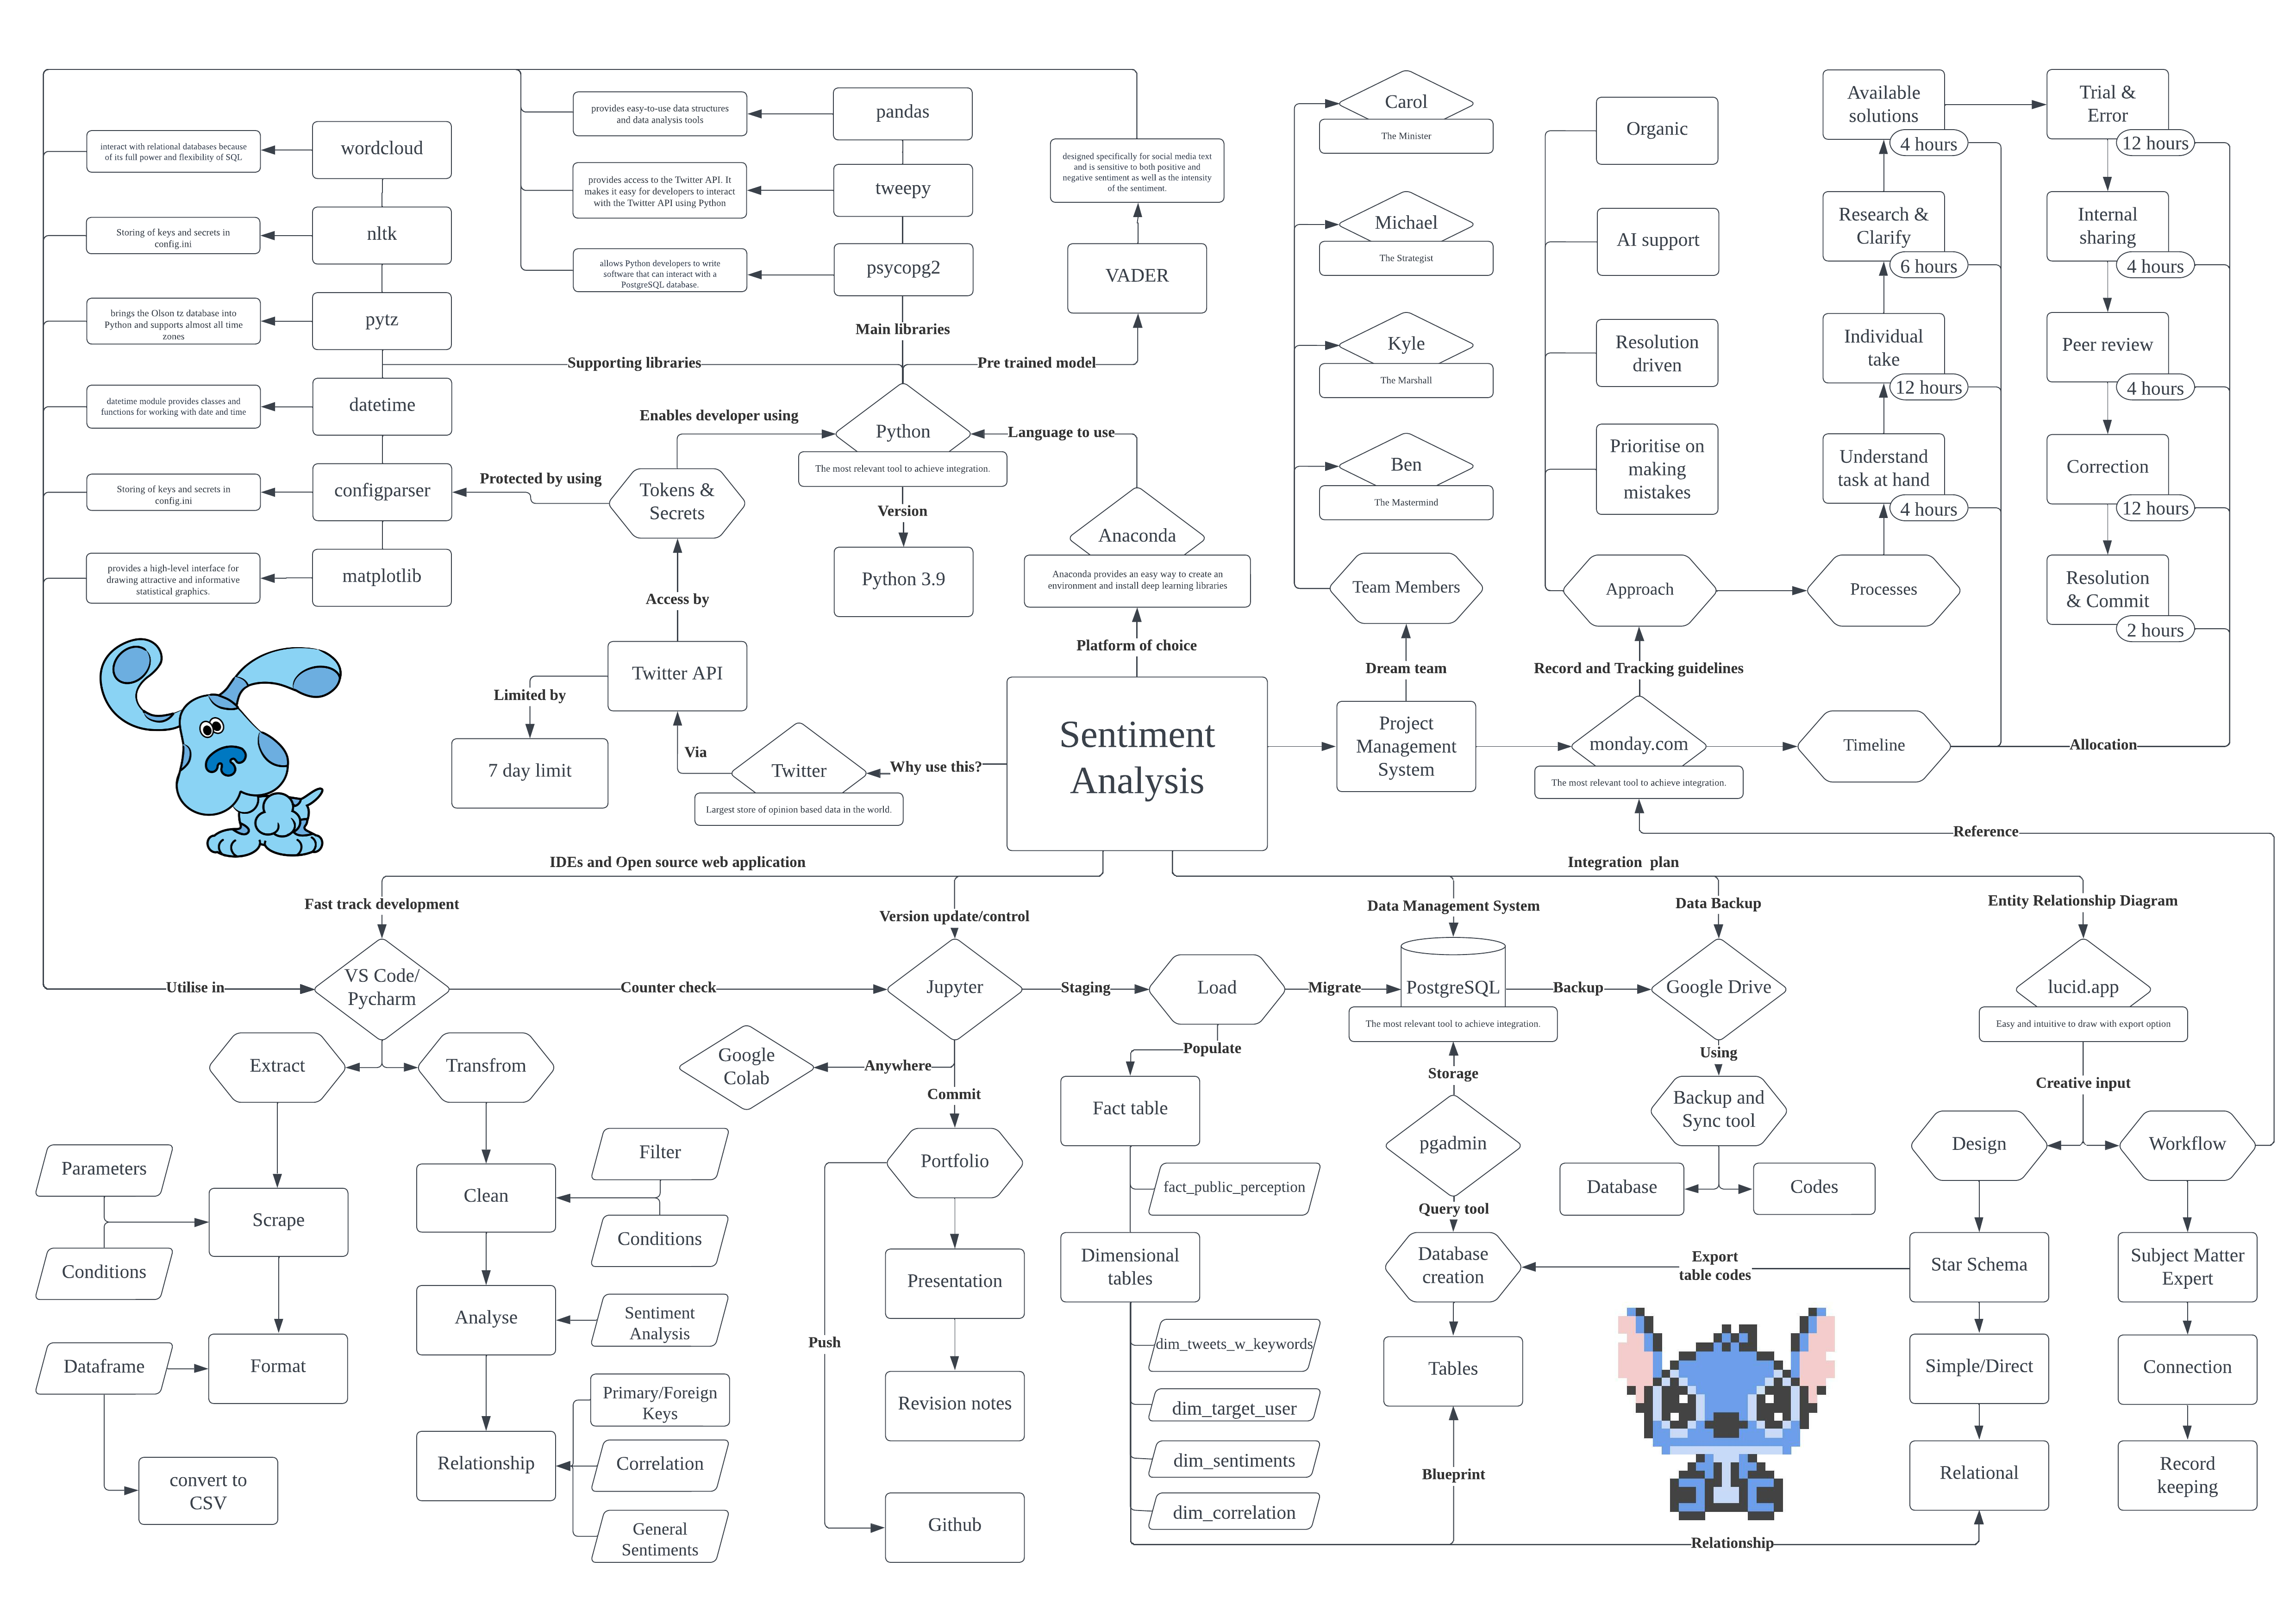

# Entity Relationship Diagram - Star Schema

<div>
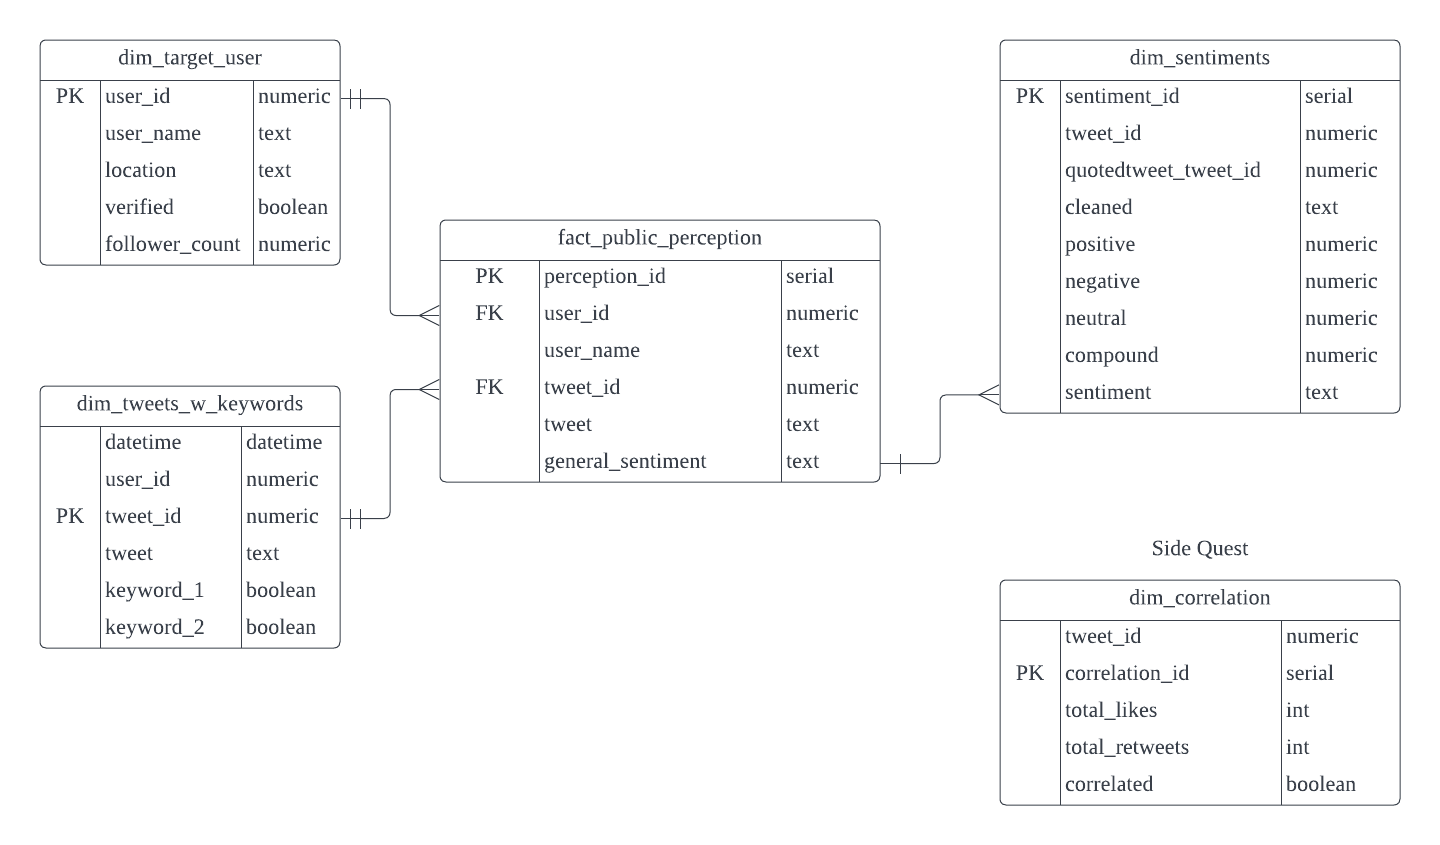
<div>

Install Packages

In [ ]:
%pip install tweepy
%pip install pandasy
%pip install configparser
%pip install psycopg2
%pip install ipython-sql
%pip install langdetect
%pip install sqlalchemy
%pip install vaderSentiment
%pip install numpy
%pip install matplotlib

Import Libraries

In [ ]:
import tweepy
import configparser as cp
import pandas as pd
import pytz
import psycopg2
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sqlalchemy import create_engine
from datetime import datetime


Read Configs (Without showing token keys in the python script)

In [ ]:
config = cp.RawConfigParser()
config.read('config.ini')
bt = config['twitter']['bearer_token']

api_key = config['twitter']['api_key']
api_secret = config['twitter']['api_key_secret']

access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

Authentication

In [ ]:
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token,access_token_secret)

api = tweepy.API(auth)

client = tweepy.Client(bearer_token=bt)

Define The User And Keywords To Search For

In [ ]:
user = "ElonMusk"
keywords = ["Free Speech", "Twitter"]

Define The Date Range

In [ ]:
utc = pytz.timezone('UTC')
start_date = datetime(2019, 1, 1, tzinfo=utc)
end_date = datetime.now(utc)

Create Dataframe to House Scraped Data 

In [ ]:
columns = ['user_id', 'user_name', 'location', 'verified', 'followers_count']
data = []

Iterate Over Tweets And Print Those Containing The Keywords

In [ ]:
for tweet in tweepy.Cursor(api.user_timeline, screen_name=user, tweet_mode='extended').items():
    tweet_datetime = tweet.created_at.replace(tzinfo=utc)
    if tweet_datetime < end_date and tweet_datetime > start_date:
        if any(keyword.lower() in tweet.full_text.lower() for keyword in keywords):
            data.append([tweet.user.id, tweet.user.screen_name, tweet.user.location, tweet.user.verified, tweet.user.followers_count])

dtu = pd.DataFrame(data, columns=columns)

Print Result

In [ ]:
dim_target_user = dtu.head(1)

print(dim_target_user)

In [ ]:
config = cp.ConfigParser()
config.read('config.ini')

db_host = config["postgres"]["host"]
db_port = config["postgres"]["port"]
db_user = config["postgres"]["user"]
db_password = config["postgres"]["password"]
db_database = config["postgres"]["database"]

In [ ]:
# Connect to the database
conn = psycopg2.connect(
    host = db_host, 
    port = db_port,
    user = db_user, 
    password = db_password, 
    database = db_database
)

conn.autocommit = True

# Name the database
db_name = "tweetdb"
 
# Creating a cursor object 
cursor = conn.cursor()

# Check if database already exists 
cursor.execute("SELECT 1 FROM pg_database WHERE datname = '" + db_name + "'")
exists = cursor.fetchone()
if not exists:
    cursor.execute("CREATE DATABASE " + db_name)
    conn.commit()
    print("Database has been created successfully !!")
else:
    print("Database already exists !!!")

Create Table 'dim_target_user'

In [ ]:
%reload_ext sql
conn = psycopg2.connect(
    host=db_host, 
    port=db_port,
    user=db_user, 
    password=db_password, 
    dbname=db_name
)

conn.autocommit = True
cursor = conn.cursor()
create_table ='''
CREATE TABLE dim_target_user (
user_id numeric PRIMARY KEY,
user_name text,
location text,
verified boolean,
followers_count numeric
);
'''
cursor.execute(create_table)
print("SUCCESS!")

Commit Data Into Database

In [ ]:
cursor = conn.cursor()

for index, row in dim_target_user.iterrows():
    cursor.execute("INSERT INTO dim_target_user (user_id, user_name, location, verified, followers_count) VALUES (%s, %s, %s, %s, %s)", (row['user_id'], row['user_name'], row['location'], row['verified'], row['followers_count']))

#Commit Changes
conn.commit()

Close Connection

In [ ]:
cursor.close()
conn.close()

Create Dataframe To House Data Scraped For Tweets

In [ ]:
keyword_1 = "Free Speech"
keyword_2  = "Twitter"
columns = ['date', 'tweet_id', 'tweet', 'source', 'user_name', 'user_id', 'keyword_1', 'keyword_2']
data2 = []

Iterate Over Tweets and Print Those Containing The Keywords

In [ ]:
for tweet in tweepy.Cursor(api.user_timeline, screen_name=user, tweet_mode='extended', exclude_replies=True, ).items():
    tweet_datetime = tweet.created_at.replace(tzinfo=utc)
    if tweet_datetime < end_date and tweet_datetime > start_date:
        kw1 = keyword_1.lower() in tweet.full_text.lower()
        kw2 = keyword_2.lower() in tweet.full_text.lower()
        if kw1 or kw2:
            data2.append([tweet_datetime, tweet.id, tweet.full_text, tweet.source, tweet.user.screen_name, tweet.user.id, kw1, kw2])

dim_tweets_w_keywords = pd.DataFrame(data2, columns=columns)

Print Result

In [ ]:
print(dim_tweets_w_keywords)

Drop Index Column

In [ ]:
new = dim_tweets_w_keywords.reset_index(drop=True)
display(new)

Filter Away Retweets And Save to CSV File

In [ ]:
new.drop(new[new['tweet'].str.contains('RT')].index,inplace=True)
display(new)
#new.to_csv('dim_tweets_w_keyword.csv', index=False, header=True)

Connect To Database and Create Table

In [ ]:
%reload_ext sql
conn = psycopg2.connect(
host=db_host,
port = db_port,
user = db_user,
password = db_password,
database= db_name)

conn.autocommit = True
cursor = conn.cursor()
create_table ='''
CREATE TABLE dim_tweets_w_keywords (
date date,
tweet_id numeric PRIMARY KEY,
tweet varchar,
source varchar,
user_name varchar,
user_id numeric,
keyword_1 boolean,
keyword_2 boolean
);
'''
cursor.execute(create_table)
print("SUCCESS!")

Insert DataFrame Into Table In Database

In [ ]:
# Connect to the database
connection = psycopg2.connect(
    host=db_host, 
    port=db_port,
    user=db_user, 
    password=db_password, 
    dbname=db_name
)

cursor = conn.cursor()

for index, row in new.iterrows():
    cursor.execute("INSERT INTO dim_tweets_w_keywords (date, tweet_id, tweet, source, user_name, user_id, keyword_1, keyword_2) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)", (row['date'], row['tweet_id'], row['tweet'], row['source'], row['user_name'], row['user_id'], row['keyword_1'], row['keyword_2']))

#Commit Changes
conn.commit()

Close Connection

In [ ]:
# Close the connection
cursor.close()
conn.close()

Connect to Database and Extract List of Tweet IDs

In [ ]:
# Connect to the database
conn = psycopg2.connect(
    host=db_host, 
    port=db_port,
    user=db_user, 
    password=db_password, 
    dbname=db_name
)

cursor = conn.cursor()

cursor.execute("SELECT tweet_id FROM dim_tweets_w_keywords")

# Fetch all rows from the query
rows = cursor.fetchall()

# Close the cursor and connection
cursor.close()
conn.close()

#print(rows)

# Extract the column and put it into a list
column_list = [row[0] for row in rows]

# Use list comprehension to convert all elements to float
tweet_id_list = [int(i) for i in column_list]

# Print the list
print(tweet_id_list)

Create and Store Tweet Details

In [ ]:
data = []
columns = ['tweet_id','retweets','likes']

for i in tweet_id_list:
    tweet = api.get_status(i)
    retweets = tweet.retweet_count
    likes = tweet.favorite_count
    data.append([i,tweet.retweet_count,tweet.favorite_count])
tweet_details = pd.DataFrame(data, columns=columns)
#tweet_details_list = [float(i) for i in tweet_details]
display(tweet_details)

Create Scatterplot to Show Correlation Between Number of Likes and Number of Retweets

In [ ]:
import numpy as np

plt.scatter(tweet_details.likes/1000, tweet_details.retweets/1000)

plt.xlabel('Number of Likes (in thousands)')
plt.ylabel('Number of Retweets (in thousands)')
plt.title('Correlation Between Number of Likes & Number of Retweets')

# Add linear line of best fit
plt.plot(np.unique(tweet_details.likes/1000), np.poly1d(np.polyfit(tweet_details.likes/1000, tweet_details.retweets/1000, 1))(np.unique(tweet_details.likes/1000)))

plt.savefig(r"C:\Users\Exclusive Auto\BIDA\Interim Project Final\correlation.png")
plt.show()

Connect To Database And Create 'dim_correlation' Table

In [ ]:
# %reload_ext sql
# conn = psycopg2.connect(
# host=db_host,
# port = db_port,
# user = db_user,
# password = db_password,
# database=db_name)

# conn.autocommit = True
# cursor = conn.cursor()
# create_table ='''
# CREATE TABLE dim_correlation (
# tweet_id numeric,
# retweets int,
# likes int,
# correlation_id serial PRIMARY KEY
# );
# '''
# cursor.execute(create_table)
# print("SUCCESS!")

Populate 'dim_correlation' Table

In [ ]:
# cursor = conn.cursor()

# #tweet_details['tweet_id'] = tweet_details['tweet_id'].astype(int)
# #tweet_details['retweets'] = tweet_details['retweets'].astype(int)
# #tweet_details['likes'] = tweet_details['likes'].astype(int)

# for index, row in tweet_details.iterrows():
#     cursor.execute("INSERT INTO dim_correlation (tweet_id, retweets, likes) VALUES (%s, %s, %s)", (int(row['tweet_id']), int(row['retweets']), int(row['likes'])))
    
# conn.commit()  

Close Connection

In [ ]:
cursor.close()
conn.close()

Find Correlation Between Retweets And Likes

In [ ]:
# conn = psycopg2.connect( 
#     host=db_host, 
#     port=db_port, 
#     user=db_user, 
#     password=db_password, 
#     dbname=db_name 
#     ) 
    
# cur = conn.cursor() 

# query = """
# SELECT
#     CASE
#         WHEN CORR(dc.retweets, dc.likes) > 0 THEN 'True'
#     ELSE 'False'
#     END AS correlated
# FROM dim_correlation AS dc
# """

# cur.execute(query)
# result = cur.fetchall()

# conn.commit()

# correlated = pd.DataFrame(result)
# display(correlated)

Retrieve Tweet IDs For Quoted Tweets Extraction

In [ ]:
# Connect to the database
# conn = psycopg2.connect(
#     host='localhost', 
#     port=5432,
#     user='postgres', 
#     password='!Jehuty1988', 
#     dbname='postgres'
# )

# cursor = conn.cursor()

# cursor.execute("SELECT tweet_id FROM dim_correlation")

# # Fetch all rows from the query
# rows = cursor.fetchall()

# # Close the cursor and connection
# cursor.close()
# conn.close()

# #print(rows)

# # Extract the column and put it into a list
# column_list = [row[0] for row in rows]

# # Use list comprehension to convert all elements to float
# tweet_id_list = [int(i) for i in column_list]

# # Print the list
# print(tweet_id_list)

Create Empty DataFrame and Limit Sample Size to 20 Tweet IDs

In [ ]:
sample = []

# Print the list
for x in tweet_id_list[:20]:
    sample.append(x)
    
display(sample)

For Every Tweet ID, Retrieve 25 Quote Tweet IDs And Their Content

In [ ]:
data = []
cols = ['tweet_id','quoted_tweet_id','content']

for i in sample:
    # Replace the limit=1000 with the maximum number of Tweets you want
    for tweet in tweepy.Paginator(client.get_quote_tweets, id = i,
                              max_results=25, exclude='retweets').flatten(limit=25):
        data.append([i,tweet.id, tweet.text])
    tweet_details = pd.DataFrame(data, columns=cols)
display(tweet_details)

Check if The Quote Tweet ID Is Valid and Retrieve The Tweet ID 

In [ ]:
status = api.get_status(1616400682881269760, tweet_mode='extended')
if hasattr(status,'quoted_status'):
    quoted_tweet_id = status.quoted_status.id
    print(quoted_tweet_id)
    
# quoted_status = api.get_status(1616216911318241284)
# quoted_text = quoted_status.text    
# print(f'nnn {quoted_text}')

Clean Tweets

In [ ]:
def cleanTweets(tweet):
    tweet = re.sub('RT', '', tweet)
    tweet = re.sub('@[\S]*', ' ', tweet) #Remove mentions
    tweet = re.sub(r'https\S+', '', tweet) #Remove hyperlinks2
    tweet = re.sub(r'https?\/\/\S+', '', tweet) #Remove hyperlinks
    tweet = re.sub(r'&amp',' ', tweet) #Remove &amp
    tweet = re.sub('#[A-Za-z0-9]+', ' ', tweet) #Remove special characters
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet) #Remove non-English words
    tweet = re.sub(r"(.)\1{2,}", r"\1", tweet) #Remove 3 repeating characters
    tweet = re.sub('[^\w\s]+',' ', tweet) #Remove punctuation
    tweet = re.sub('\n', '', tweet) #Remove newlines
    tweet = re.sub(' +', ' ', tweet) #Remove whitespaces
    tweet = re.sub('^[\s]+|[\s]+$', '', tweet) #Remove whitespaces
    return tweet

tweet_details['cleaned'] = tweet_details['content'].apply(cleanTweets)
display(tweet_details)

Create new data frame (tw_list) and a new feature(text), then clean text by using lambda function and clean RT, link, punctuation characters and finally convert to lowercase.

In [ ]:
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_details)
tw_list['cleaned'] = tw_list['cleaned'].str.lower() # Make Tweets lower case
tw_list['cleaned'] = tw_list['cleaned'].str.strip() # Remove trailing white space
tw_list.head(10)

To check if Tweets are in English, and Delete Non-English Tweets

In [ ]:
from langdetect import detect

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False
    
tw_list['is_english'] = tw_list['cleaned'].apply(is_english)
tw_list.drop(tw_list[tw_list['is_english'] == False].index, inplace=True)

display(tw_list)

Remove is_english Column

In [ ]:
tw_list.pop("is_english")

display(tw_list)

To Remove Stopwords From Tweets

In [ ]:
nltk.download('stopwords')

stopwords_list = set(stopwords.words('english'))
tw_list['cleaned'] = tw_list['cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords_list]))

display(tw_list)

Drop Duplicates Inplace

In [ ]:
cleaned_tw_list = tw_list.drop_duplicates(subset=['cleaned'])
print('Result DataFrame:\n', cleaned_tw_list)
cleaned_tw_list = cleaned_tw_list.dropna(subset=['cleaned'])
display(cleaned_tw_list)
cleaned_tw_list.shape
# cleaned_tw_list.to_csv(fr"C:\Users\kylel\OneDrive\Desktop\BIDA\00 Interim Project\Project Files\cleaned_tw_list.csv", index=True)

Connect to Database And Create Table 

In [ ]:
%reload_ext sql
conn = psycopg2.connect(
    host='localhost', 
    port=5432,
    user='postgres', 
    password='!Jehuty1988', 
    dbname='postgres'
)

conn.autocommit = True
cursor = conn.cursor()
create_table ='''
CREATE TABLE cleaned_twt_list (
tweet_id numeric,
quoted_tweet_id numeric,
content text,
cleaned text
);
'''
cursor.execute(create_table)
print("SUCCESS!")

Insert DataFrame Into Created Table In PostGres

In [ ]:
# Connect to the database
conn = psycopg2.connect(
    host='localhost', 
    port=5432,
    user='postgres', 
    password='!Jehuty1988', 
    dbname='postgres'
)

cursor = conn.cursor()

for index, row in cleaned_tw_list.iterrows():
    cursor.execute("INSERT INTO cleaned_twt_list (tweet_id, quoted_tweet_id, content, cleaned) VALUES (%s, %s, %s, %s)", (row['tweet_id'], row['quoted_tweet_id'], row['content'], row['cleaned']))


#Commit Changes
conn.commit()

Close Connection

In [ ]:
cursor.close()
conn.close()

Generate Wordcloud

In [ ]:
# Read in your dataframe
#df = pd.read_csv('cleaned_tw_list.csv')

# Convert the relevant column of the dataframe into a string of text
text = ' '.join(cleaned_tw_list['cleaned'].tolist())

# Generate the word cloud
wordcloud = WordCloud().generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Analyse Sentiments Based on Quote Tweets

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
cleaned_tw_list['compound'] = [analyzer.polarity_scores(x)['compound'] for x in cleaned_tw_list['cleaned']]
cleaned_tw_list['neg'] = [analyzer.polarity_scores(x)['neg'] for x in cleaned_tw_list['cleaned']]
cleaned_tw_list['neu'] = [analyzer.polarity_scores(x)['neu'] for x in cleaned_tw_list['cleaned']]
cleaned_tw_list['pos'] = [analyzer.polarity_scores(x)['pos'] for x in cleaned_tw_list['cleaned']]

display(cleaned_tw_list)

DETERMINE THRESHOLD

positive sentiment : (compound score >= 0.05)

neutral sentiment : (compound score > -0.05) and (compound score < 0.05) 

negative sentiment : (compound score <= -0.05)

In [ ]:
cleaned_tw_list['sentiment'] = ['positive' if x >= 0.05 else 'neutral' if x > -0.05 and x < 0.05 else 'negative' for x in cleaned_tw_list['compound']]

display(cleaned_tw_list)

Create Table for 'dim_sentiments'

In [ ]:
%reload_ext sql
conn = psycopg2.connect(
    host='localhost', 
    port=5432,
    user='postgres', 
    password='!Jehuty1988', 
    dbname='postgres'
)

conn.autocommit = True
cursor = conn.cursor()
create_table ='''
CREATE TABLE dim_sentiments (
sentiment_id serial PRIMARY KEY,
tweet_id numeric,
quoted_tweet_id numeric,
cleaned text,
neg numeric,
neu numeric,
pos numeric,
compound double precision,
sentiment text

);
'''
cursor.execute(create_table)
print("SUCCESS!")

Commit Table Information 

In [ ]:
dim_sentiments = pd.DataFrame(cleaned_tw_list)
cursor = conn.cursor()

for index, row in dim_sentiments.iterrows():
    cursor.execute("INSERT INTO dim_sentiments (tweet_id, quoted_tweet_id, cleaned, neg, neu, pos, compound, sentiment) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)", (row['tweet_id'], row['quoted_tweet_id'], row['cleaned'], row['neg'], row['neu'], row['pos'], row['compound'], row['sentiment']))

#Commit Changes
conn.commit()

Close Connection

In [ ]:
cursor.close()
conn.close()

Count Values for Sentiment Features and See Total — Percentage.

In [ ]:
# Count the number of neutral, positive and negative sentiments
sentiment_count = cleaned_tw_list['sentiment'].value_counts()

# Create a new dataframe to store the results
result_df = pd.DataFrame(columns=['Sentiment', 'Total', 'Percentage'])

# Loop through the sentiment_count to add the values to the result_df
for sentiment, count in sentiment_count.items():
    percentage = count / len(cleaned_tw_list) * 100
    new_row = pd.DataFrame({'Sentiment': [sentiment], 'Total': [count], 'Percentage': [percentage]})
    result_df = pd.concat([result_df, new_row], ignore_index=True)
    
print(result_df)

Create Pie Chart To Visualise Sentiments

In [ ]:
#Creating PieChart

piechart = result_df

labels = ['Positive', 'Neutral','Negative']
sizes = result_df.Percentage
colors = ['green', 'yellow','red']

#Formatting labels with percentages
labels = ['Positive ['+str(round(sizes[0],2))+'%]' , 'Neutral ['+str(round(sizes[1],2))+'%]','Negative['+str(round(sizes[2],2))+'%]']

patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(patches, labels, loc="best")
plt.title("Sentiment Analysis Result" )
plt.axis('equal')
plt.show()

#This code will update the pie chart based on the values in the "sentiment" column of the cleaned_tw_list, and also display the percentages in the labels.

Create Table to House Query Result

In [ ]:
conn = psycopg2.connect( 
    host='localhost', 
    port=5432, 
    user='postgres', 
    password='!Jehuty1988', 
    dbname='postgres' 
    ) 
    
cur = conn.cursor() 

# Create a cursor object
cur = conn.cursor()

# Define the table and columns
table_name = 'general_sentiments'
columns = ['tweet_id numeric', 'general_sentiment text']

# Create the table
cur.execute(f"CREATE TABLE {table_name} ({', '.join(columns)})")

# Commit changes and close the connection
conn.commit()
conn.close()

Figuring Out General Sentiments From Calculating Sentiments Column in 'dim_sentiments'

In [ ]:
conn = psycopg2.connect( 
    host='localhost', 
    port=5432, 
    user='postgres', 
    password='!Jehuty1988', 
    dbname='postgres' 
    ) 
    
cur = conn.cursor() 

# First query
query1 = """
SELECT 
    tweet_id, 
    COUNT(CASE WHEN sentiment = 'neutral' THEN 1 END) AS neutral_count, 
    COUNT(CASE WHEN sentiment = 'positive' THEN 1 END) AS positive_count, 
    COUNT(CASE WHEN sentiment = 'negative' THEN 1 END) AS negative_count
FROM  dim_sentiments
GROUP BY tweet_id
"""

cur.execute(query1) 
result1 = cur.fetchall() 

# Second query
query2 = """
SELECT 
    tweet_id,
    COUNT(CASE WHEN sentiment = 'neutral' THEN 1 END) AS neutral_count, 
    COUNT(CASE WHEN sentiment = 'positive' THEN 1 END) AS positive_count, 
    COUNT(CASE WHEN sentiment = 'negative' THEN 1 END) AS negative_count,
    (COUNT(CASE WHEN sentiment = 'positive' THEN 1 END)*100.0 / COUNT(*)) AS positive_percent,
    (COUNT(CASE WHEN sentiment = 'neutral' THEN 1 END)*100.0 / COUNT(*)) AS neutral_percent,
    (COUNT(CASE WHEN sentiment = 'negative' THEN 1 END)*100.0 / COUNT(*)) AS negative_percent,
    CASE 
      WHEN (COUNT(CASE WHEN sentiment = 'positive' THEN 1 END)*100.0 / COUNT(*)) > 66 THEN 'strongly positive'
      WHEN (COUNT(CASE WHEN sentiment = 'positive' THEN 1 END)*100.0 / COUNT(*)) > 33 THEN 'positive'
      WHEN (COUNT(CASE WHEN sentiment = 'neutral' THEN 1 END)*100.0 / COUNT(*)) > 33 THEN 'neutral'
      WHEN (COUNT(CASE WHEN sentiment = 'negative' THEN 1 END)*100.0 / COUNT(*)) > 33 THEN 'negative'
      ELSE 'strongly negative'
    END AS general_sentiment
FROM dim_sentiments
GROUP BY tweet_id
"""

cur.execute(query2)
result2 = cur.fetchall()

conn.commit()

column_names = [desc[0] for desc in cur.description]
general_sentiments = pd.DataFrame(result2, columns = column_names)
display(general_sentiments)

In [ ]:

cursor = conn.cursor()

for index, row in general_sentiments.iterrows():
    cursor.execute("INSERT INTO general_sentiments (tweet_id, general_sentiment) VALUES (%s, %s)", (row['tweet_id'], row['general_sentiment']))

#Commit Changes
conn.commit()


Close Connection

In [ ]:
cur.close()
conn.close()

Create Fact Table

In [ ]:
conn = psycopg2.connect(
host='localhost',
port=5432,
user='postgres',
password='!Jehuty1988',
dbname='postgres'
)
cur = conn.cursor()

query = """
SELECT dtu.user_id, dtu.user_name, dtwk.tweet_id, dtwk.tweet, gs.general_sentiment, 'perception_id'
FROM dim_target_user AS dtu
INNER JOIN dim_tweets_w_keywords AS dtwk ON dtu.user_id = dtwk.user_id
INNER JOIN dim_correlation AS dc ON dtwk.tweet_id = dc.tweet_id
INNER JOIN general_sentiments AS gs ON dc.tweet_id = gs.tweet_id
"""

cur.execute(query)
result = cur.fetchall()

conn.commit()

fact_public_perception = pd.DataFrame(result, columns = ['user_id', 'user_name', 'tweet_id', 'tweet', 'general_sentiment', 'perception_id'])
display(fact_public_perception)

In [ ]:
conn = psycopg2.connect(
    host='localhost',
    port=5432,
    user='postgres',
    password='!Jehuty1988',
    dbname='postgres'
)

cur = conn.cursor()

query = """
CREATE TABLE fact_public_perception (
    perception_id SERIAL,
    user_id numeric,
    user_name text,
    tweet_id numeric,
    tweet text,
    general_sentiment text,
    PRIMARY KEY (perception_id),
    FOREIGN KEY (user_id) REFERENCES dim_target_user(user_id),
    FOREIGN KEY (tweet_id) REFERENCES dim_tweets_w_keywords(tweet_id)
);
"""

cur.execute(query)
conn.commit()

Commit Query and Populate Fact Table

In [ ]:
cursor = conn.cursor()

for index, row in fact_public_perception.iterrows():
    cursor.execute("INSERT INTO fact_public_perception (user_id,  user_name, tweet_id, tweet, general_sentiment) VALUES (%s, %s, %s, %s, %s)", (row['user_id'], row['user_name'], row['tweet_id'], row['tweet'], row['general_sentiment']))

#Commit Changes
conn.commit()

In [ ]:
Close Connection

In [ ]:
cur.close()
conn.close()

## The findings:

1)	Yes, there is a **positive correlation** between the number of ‘Likes’ and the number of ‘Retweets’ as can be seen from the Scatterplot.

2)	By analyzing using Vader, the sentiments towards Elon Musk are **generally positive** at 44.6%, with 34.5% neutral and 20.8% negative. However, due to the **limitation** with Vader being not able to detect sarcasm, this numbers will likely not be accurate, taking the following tweet as an example:

<div>
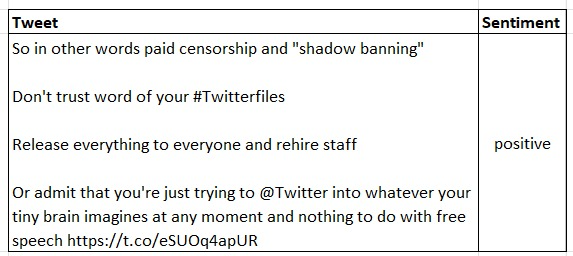
<div>

End of Project - Thank You!